# Action1_pytorch_cifar10

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
from torch.utils.data import DataLoader

In [12]:
# 数据加载
train_data = datasets.CIFAR10(root='./',train=True, transform=transforms.ToTensor()) #  download=True
test_data = datasets.CIFAR10(root='./',train=False, transform=transforms.ToTensor())

In [90]:
# 50000训练图片，10000测试图片
train_data.data.shape,test_data.data.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

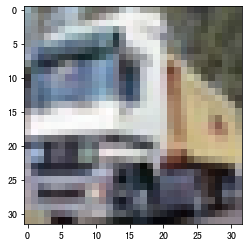

In [95]:
plt.imshow(train_data.data[1])

(3, 32, 32)
[[[0.6039216  0.49411765 0.4117647  ... 0.35686275 0.34117648 0.30980393]
  [0.54901963 0.5686275  0.49019608 ... 0.3764706  0.3019608  0.2784314 ]
  [0.54901963 0.54509807 0.4509804  ... 0.30980393 0.26666668 0.2627451 ]
  ...
  [0.6862745  0.6117647  0.6039216  ... 0.16470589 0.23921569 0.3647059 ]
  [0.64705884 0.6117647  0.62352943 ... 0.40392157 0.48235294 0.5137255 ]
  [0.6392157  0.61960787 0.6392157  ... 0.56078434 0.56078434 0.56078434]]

 [[0.69411767 0.5372549  0.40784314 ... 0.37254903 0.3529412  0.31764707]
  [0.627451   0.6        0.49019608 ... 0.3882353  0.3137255  0.28627452]
  [0.60784316 0.57254905 0.4509804  ... 0.32156864 0.27450982 0.27058825]
  ...
  [0.654902   0.6039216  0.627451   ... 0.13333334 0.20784314 0.3254902 ]
  [0.6039216  0.59607846 0.6313726  ... 0.3647059  0.44705883 0.4745098 ]
  [0.5803922  0.5803922  0.6117647  ... 0.52156866 0.5254902  0.52156866]]

 [[0.73333335 0.53333336 0.37254903 ... 0.2784314  0.2784314  0.27450982]
  [0.66274

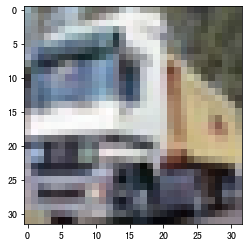

In [77]:
# 输出图像,
temp = train_data[1][0].numpy()
print(temp.shape)
print(temp)
temp = temp.transpose(1, 2, 0) # 调换temp.shape的三个维度0，1，2位置
print(temp.shape)
print(temp)
plt.imshow(temp)

In [98]:
# 超参数定义
EPOCH = 10
BATCH_SIZE = 128
LR = 0.001  # 学习率

# 使用DataLoader进行分批,一批64副图像，分782批
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE) # 没有shuffle，因为不进行训练

# 使用ResNet
model = torchvision.models.resnet18(pretrained=True) # 进行预训练,models注意有s

In [99]:
# 定义损失函数为交叉熵，二分类常用损失函数
criterion = nn.CrossEntropyLoss()

# 定义优化器为adam，引入二阶动量
optimizer = optim.Adam(model.parameters(), lr=LR)

# 定义device  gpu
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [100]:
# 训练,cpu环境
for epoch in range(EPOCH):
    start_time = time.time()
    for i, data in enumerate(train_loader):
        inputs, labels = data
#         inputs, labels = inputs.to(device), labels.to(device) # 如果有gpu将数据放到gpu里
        # 前向传播
        outputs = model(inputs)
        # 计算损失函数
        loss = criterion(outputs, labels)
        # 清空上一轮梯度
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 知道梯度方向以后，参数更新
        optimizer.step()
    print('epoch{} loss:{: .4f} time{: .4f}'.format(epoch+1, loss.item(), time.time()-start_time))

epoch1 loss: 0.7616 time 70.1090
epoch2 loss: 0.7604 time 69.6568
epoch3 loss: 0.5257 time 69.9501
epoch4 loss: 0.4463 time 69.8382
epoch5 loss: 0.5956 time 70.0077
epoch6 loss: 0.2346 time 70.4371
epoch7 loss: 0.3216 time 70.1007
epoch8 loss: 0.2577 time 69.7948
epoch9 loss: 0.2251 time 70.3087
epoch10 loss: 0.1250 time 69.9635


In [101]:
# 保存训练模型
file_name = 'cifar10_resnet.pt'
torch.save(model, file_name)
print(file_name + ' saved ')

cifar10_resnet.pt saved 


In [102]:
# 测试
model = torch.load(file_name)
model.eval()  # 不启用 BatchNormalization 和 Dropout,固定BN和dropout层，使得偏置参数不随着发生变化。因为当batchsize小时，如果没有固定，会对图像的失真有很大的影响

correct, total = 0, 0
for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # 前向传播
    out = model(images)
    # 预测结果
    _, predicted = torch.max(out.data, 1)
    # 判断预测结果与实际结果是否一致
    total += labels.size(0)
    correct += (predicted==labels).sum().item()
    
# 输出识别准确率
print('10000张测试图像的准确率：{: .4f}'.format(100*correct/total))

10000张测试图像的准确率： 79.8400


In [103]:
# values是给定维中的每行张量的最大值；indices是找到的每个最大值的索引位置。
# 最大值相当于softmax的概率最大的位置的索引，就是分类的标签
torch.max(out.data,1)

torch.return_types.max(
values=tensor([10.5876, 13.8441,  9.7160, 13.9375, 21.3442, 12.6578, 17.7501, 12.2050,
        16.3147, 13.3066, 14.7981, 12.0003, 11.9597, 17.4236, 12.1771, 15.5576]),
indices=tensor([7, 5, 8, 0, 8, 4, 7, 0, 3, 3, 3, 0, 3, 5, 0, 7]))

In [104]:
out.data.shape

torch.Size([16, 1000])

In [105]:
max(out.data[0])

tensor(10.5876)

In [66]:
total

10000

In [67]:
labels.size(0)

16